# INTELIGENCIA ARTIFICIAL - Evaluación 4
## Punto 1
### Integrante: Sebastian Racedo - Sebastian Valle
Primero importaremos las librerias que necesitarems para llevar a cabo la implementación de
los algoritmos.

* Usaremos la libreria pandas para poder manejar los datasets de una manera optima
* Usaremos la libreria math para operaciones matematicas
* Usaremos la libreria NeuPy para todos los modelos y algoritmos orientados a inteligencia artificia
* Usaremos la libreria numpy para las operaciones con matrices
* Usaremos sklearn para todos los modelos y algoritmos orientados a inteligencia artificial
* Usaremos scipy para toda la parte estadistica
* Usaremos skimage para poder trabajar con las imagenes de una forma mas eficaz
* Usaremos matplotlib para toda la parte de graficos

In [1]:
import numpy as np
from math import sqrt
import pandas as pd
from neupy import algorithms
from sklearn import decomposition
from scipy import stats
from sklearn import datasets
from skimage.measure import block_reduce
import matplotlib.gridspec as gridspec
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

Para leer la data de entrada usamos la función pd.read_csv

In [2]:
zip_train = pd.read_csv("Zip_codes/zip_train.csv", header=None, sep=" ")
zip_test = pd.read_csv("Zip_codes/zip_test.csv", header=None, sep=" ")
zip_train = zip_train.drop([257], axis=1)

In [3]:
zip_train

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
0,6.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-0.631,0.862,...,0.304,0.823,1.000,0.482,-0.474,-0.991,-1.000,-1.000,-1.000,-1.0
1,5.0,-1.000,-1.000,-1.000,-0.813,-0.671,-0.809,-0.887,-0.671,-0.853,...,-0.671,-0.671,-0.033,0.761,0.762,0.126,-0.095,-0.671,-0.828,-1.0
2,4.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.000,-0.109,1.000,-0.179,-1.000,-1.000,-1.000,-1.0
3,7.0,-1.000,-1.000,-1.000,-1.000,-1.000,-0.273,0.684,0.960,0.450,...,-0.318,1.000,0.536,-0.987,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
4,3.0,-1.000,-1.000,-1.000,-1.000,-1.000,-0.928,-0.204,0.751,0.466,...,0.466,0.639,1.000,1.000,0.791,0.439,-0.199,-0.883,-1.000,-1.0
5,6.0,-1.000,-1.000,-1.000,-1.000,-1.000,-0.397,0.983,-0.535,-1.000,...,0.803,0.015,-0.862,-0.871,-0.437,-1.000,-1.000,-1.000,-1.000,-1.0
6,3.0,-1.000,-1.000,-1.000,-0.830,0.442,1.000,1.000,0.479,-0.328,...,1.000,0.671,0.345,-0.507,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
7,1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,0.510,-0.213,...,-0.654,0.666,0.301,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
8,0.0,-1.000,-1.000,-1.000,-1.000,-1.000,-0.454,0.879,-0.745,-1.000,...,1.000,1.000,1.000,0.506,-0.174,-0.811,-1.000,-1.000,-1.000,-1.0
9,1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-0.909,0.801,...,-1.000,-0.332,0.735,0.380,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0


In [4]:
zip_train.isna().sum().sum()

0

In [5]:
zip_test.isna().sum().sum()

0

Binarizamos la data para poder trabajar mejor con ella

In [6]:
y_train = zip_train.iloc[:,0].values.astype(np.int)
x_train = (zip_train.iloc[:,1:257].values >= 0.3).astype(np.int)
#x_train = (zip_train.iloc[:,1:257].values).astype(np.int)

y_test = zip_test.iloc[:,0].values.astype(np.int)
x_test = (zip_test.iloc[:,1:257].values >= 0.3).astype(np.int)
#x_test = (zip_test.iloc[:,1:257].values).astype(np.int)

matrix_x_train = [pos.reshape(16,16) for pos in x_train]          
matrix_x_test  = [pos.reshape(16,16) for pos in x_test]           
new_data = list(zip(matrix_x_train, y_train))

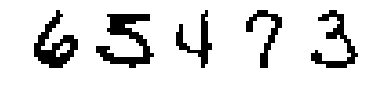

In [7]:
i = 1
for index in range(5):
    plt.subplot(1, 5, i)
    number = matrix_x_train[index]
    plt.axis('off')
    plt.imshow(number, cmap=plt.cm.gray_r, interpolation='nearest')
    i +=1

In [8]:
matrix_x_train[0]

array([[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0]])

Hacemos un preprocesamiento para bajar la dimensionalidad del problema a tratar

In [9]:
def split(array, nrows, ncols):
    """Split a matrix into sub-matrices."""

    r, h = array.shape
    return (array.reshape(h//nrows, nrows, -1, ncols)
                 .swapaxes(1, 2)
                 .reshape(-1, nrows, ncols))

In [10]:
submatrix_side_len = 8
submatrix_height_len = 8
submatrix_size = submatrix_side_len * submatrix_height_len

height_factor = 16 // submatrix_side_len
width_factor = 16 // submatrix_height_len

In [11]:
resize_data_train = np.zeros((len(matrix_x_train), submatrix_size))
for i in range(len(matrix_x_train)):
    downsampled = block_reduce(matrix_x_train[i], block_size=(height_factor, width_factor), func=np.mean)
    resize_data_train[i] = downsampled.flatten() > 0.2

In [12]:
resize_data_test = np.zeros((len(matrix_x_test), submatrix_size))
for i in range(len(matrix_x_test)):
    downsampled = block_reduce(matrix_x_test[i], block_size=(height_factor, width_factor), func=np.mean)
    resize_data_test[i] = downsampled.flatten() > 0.2

In [13]:
matrix_x_train_resized = [pos.reshape(submatrix_side_len, submatrix_height_len) for pos in resize_data_train]          
matrix_x_test_resized  = [pos.reshape(submatrix_side_len, submatrix_height_len) for pos in resize_data_test] 
len(matrix_x_train_resized)

7291

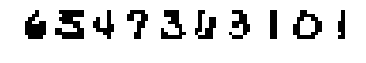

In [14]:
i = 1
for index in range(10):
    plt.subplot(1, 10, i)
    number = matrix_x_train_resized[index]
    plt.axis('off')
    plt.imshow(number, cmap=plt.cm.gray_r)
    i +=1

In [30]:
n_inputs = len(resize_data_train[0])
#n_inputs = len(x_train[0])
n_inputs

64

Usamos "algorithms.SOFM" que es una implementación de la libreria NeuPy para mapas auto-organizados

In [17]:
sofm = algorithms.SOFM(
    n_inputs=n_inputs,
    n_outputs=10,
    distance='euclid',
    #features_grid=(GRID_HEIGHT, GRID_WIDTH),  # Just me trying weird stuff
    grid_type='rect',
    # With large number of training samples it's safer
    # to use small step (learning rate)
    step=0.05,
    std=1,
    shuffle_data=True,         # Shuffles dataset before every training epoch.
    weight='sample_from_data',

    learning_radius=3,
    
    # after 10 iteration learning radius would be 0
    reduce_radius_after=5,
    verbose=True,             # Shows training progress in terminal
    show_epoch = 5           # Shows verbose each N
)
sofm.train(resize_data_train, epochs=20)
#sofm.train(x_train, epochs=10)


Main information

[ALGORITHM] SOFM

[OPTION] distance = ['euclid', 'neg_euclid_distance']
[OPTION] features_grid = None
[OPTION] grid_type = ['rectangle', 'find_neighbours_on_rect_grid', 'find_step_scaler_on_rect_grid']
[OPTION] learning_radius = 3
[OPTION] n_inputs = 64
[OPTION] n_outputs = 10
[OPTION] reduce_radius_after = 5
[OPTION] reduce_std_after = 100
[OPTION] reduce_step_after = 100
[OPTION] show_epoch = 5
[OPTION] shuffle_data = True
[OPTION] signals = None
[OPTION] std = 1
[OPTION] step = 0.05
[OPTION] verbose = True
[OPTION] weight = sample_data



#1 : [2 sec] train: 0.325513


#5 : [2 sec] train: 0.310025


#10 : [2 sec] train: 0.286134


#15 : [2 sec] train: 0.227202


#20 : [2 sec] train: 0.225246


In [18]:
a = sofm.predict(resize_data_train)
#a = sofm.predict(x_train)

In [19]:
a.shape

(7291, 10)

In [20]:
#clusters = sofm.predict(x_test).argmax(axis=1)
clusters = sofm.predict(resize_data_test).argmax(axis=1)

In [21]:
y_test

array([9, 6, 3, ..., 4, 0, 1])

In [22]:
""""
print("Building visualization...")
plt.figure(figsize=(12, 11))

grid = gridspec.GridSpec(GRID_HEIGHT, GRID_WIDTH)
grid.update(wspace=0, hspace=0)
Samples = []
for row_id in range(GRID_HEIGHT):
    print("Progress: {:.2%}".format(row_id / GRID_HEIGHT))

    for col_id in range(GRID_WIDTH):
        index = row_id * GRID_HEIGHT + col_id
        clustered_samples = x_test[clusters == index]

        if len(clustered_samples) > 0:
            # We take the first sample, but it can be any
            # sample from this cluster
            sample = clustered_samples[0]
        else:
            # If we don't have samples in cluster then
            # it means that there is a gap in space
            sample = np.zeros(256)
        Samples.append(sample)
        plt.subplot(grid[index])
        plt.imshow(sample.reshape((16, 16)), cmap='Greys')
        plt.axis('off')

print("Visualization has been built succesfully")
plt.show()
"""

'"\nprint("Building visualization...")\nplt.figure(figsize=(12, 11))\n\ngrid = gridspec.GridSpec(GRID_HEIGHT, GRID_WIDTH)\ngrid.update(wspace=0, hspace=0)\nSamples = []\nfor row_id in range(GRID_HEIGHT):\n    print("Progress: {:.2%}".format(row_id / GRID_HEIGHT))\n\n    for col_id in range(GRID_WIDTH):\n        index = row_id * GRID_HEIGHT + col_id\n        clustered_samples = x_test[clusters == index]\n\n        if len(clustered_samples) > 0:\n            # We take the first sample, but it can be any\n            # sample from this cluster\n            sample = clustered_samples[0]\n        else:\n            # If we don\'t have samples in cluster then\n            # it means that there is a gap in space\n            sample = np.zeros(256)\n        Samples.append(sample)\n        plt.subplot(grid[index])\n        plt.imshow(sample.reshape((16, 16)), cmap=\'Greys\')\n        plt.axis(\'off\')\n\nprint("Visualization has been built succesfully")\nplt.show()\n'

In [23]:
#pca_test = decomposition.PCA(n_components=2)
#pca_test.fit(x_test)
#x_test = pca_test.transform(x_test)

In [25]:
#array_samples = np.asarray(Samples)
#array_samples.shape

In [26]:
predicted = sofm.predict(resize_data_test)
#predicted = sofm.predict(x_test)
predicted = predicted.nonzero()[1]

In [27]:
original_y_test = y_test

Realizamos varias iteraciones del modelo entrenado con diferentes data de testeo y para cada caso mostramos las estadisticas encotradas junto con la matriz de confusion

Mapping 0

Información del clasificador SOFM SOFM(verbose=True, step=0.05, show_epoch=5, shuffle_data=True, signals=None, n_inputs=64, n_outputs=10, weight=(64, 10), features_grid=[10, 1], distance=['euclid', 'neg_euclid_distance'], grid_type=['rectangle', 'find_neighbours_on_rect_grid', 'find_step_scaler_on_rect_grid'], learning_radius=3, std=1, reduce_radius_after=5, reduce_std_after=100, reduce_step_after=100):
             precision    recall  f1-score   support

          0       0.84      0.45      0.58       359
          1       0.00      0.00      0.00       264
          2       0.04      0.06      0.05       198
          3       0.05      0.04      0.04       166
          4       0.02      0.02      0.02       200
          5       0.05      0.03      0.04       160
          6       0.01      0.01      0.01       170
          7       0.83      0.63      0.72       147
          8       0.25      0.45      0.32       166
          9       0.02      0.03      0.02       17

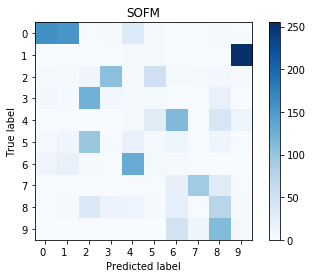

Mapping 1

Información del clasificador SOFM SOFM(verbose=True, step=0.05, show_epoch=5, shuffle_data=True, signals=None, n_inputs=64, n_outputs=10, weight=(64, 10), features_grid=[10, 1], distance=['euclid', 'neg_euclid_distance'], grid_type=['rectangle', 'find_neighbours_on_rect_grid', 'find_step_scaler_on_rect_grid'], learning_radius=3, std=1, reduce_radius_after=5, reduce_std_after=100, reduce_step_after=100):
             precision    recall  f1-score   support

          0       0.00      0.00      0.00       177
          1       0.81      0.43      0.56       359
          2       0.00      0.00      0.00       264
          3       0.82      0.54      0.65       198
          4       0.02      0.03      0.03       166
          5       0.28      0.14      0.19       200
          6       0.04      0.06      0.05       160
          7       0.00      0.00      0.00       170
          8       0.10      0.20      0.14       147
          9       0.01      0.01      0.01       16

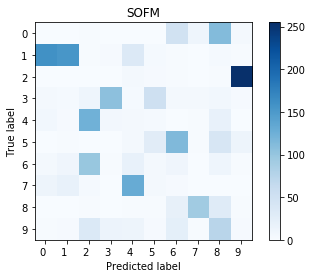

Mapping 2

Información del clasificador SOFM SOFM(verbose=True, step=0.05, show_epoch=5, shuffle_data=True, signals=None, n_inputs=64, n_outputs=10, weight=(64, 10), features_grid=[10, 1], distance=['euclid', 'neg_euclid_distance'], grid_type=['rectangle', 'find_neighbours_on_rect_grid', 'find_step_scaler_on_rect_grid'], learning_radius=3, std=1, reduce_radius_after=5, reduce_std_after=100, reduce_step_after=100):
             precision    recall  f1-score   support

          0       0.01      0.01      0.01       166
          1       0.00      0.00      0.00       177
          2       0.00      0.00      0.00       359
          3       0.00      0.00      0.00       264
          4       0.01      0.02      0.01       198
          5       0.03      0.02      0.02       166
          6       0.51      0.57      0.54       200
          7       0.00      0.00      0.00       160
          8       0.00      0.00      0.00       170
          9       0.00      0.01      0.00       14

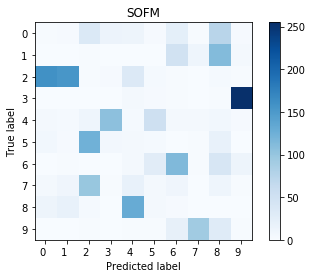

Mapping 3

Información del clasificador SOFM SOFM(verbose=True, step=0.05, show_epoch=5, shuffle_data=True, signals=None, n_inputs=64, n_outputs=10, weight=(64, 10), features_grid=[10, 1], distance=['euclid', 'neg_euclid_distance'], grid_type=['rectangle', 'find_neighbours_on_rect_grid', 'find_step_scaler_on_rect_grid'], learning_radius=3, std=1, reduce_radius_after=5, reduce_std_after=100, reduce_step_after=100):
             precision    recall  f1-score   support

          0       0.00      0.00      0.00       147
          1       0.01      0.01      0.01       166
          2       0.00      0.01      0.00       177
          3       0.02      0.01      0.01       359
          4       0.02      0.02      0.02       264
          5       0.52      0.26      0.35       198
          6       0.00      0.00      0.00       166
          7       0.01      0.01      0.01       200
          8       0.04      0.07      0.05       160
          9       0.00      0.00      0.00       17

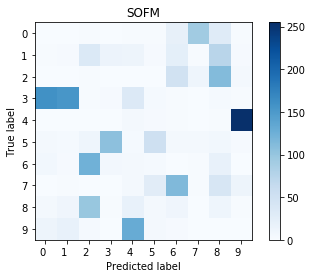

Mapping 4

Información del clasificador SOFM SOFM(verbose=True, step=0.05, show_epoch=5, shuffle_data=True, signals=None, n_inputs=64, n_outputs=10, weight=(64, 10), features_grid=[10, 1], distance=['euclid', 'neg_euclid_distance'], grid_type=['rectangle', 'find_neighbours_on_rect_grid', 'find_step_scaler_on_rect_grid'], learning_radius=3, std=1, reduce_radius_after=5, reduce_std_after=100, reduce_step_after=100):
             precision    recall  f1-score   support

          0       0.06      0.07      0.07       170
          1       0.00      0.00      0.00       147
          2       0.13      0.21      0.16       166
          3       0.00      0.00      0.00       177
          4       0.16      0.09      0.12       359
          5       0.02      0.01      0.01       264
          6       0.02      0.02      0.02       198
          7       0.01      0.01      0.01       166
          8       0.14      0.20      0.16       200
          9       0.00      0.01      0.00       16

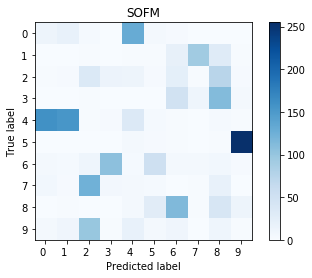

Mapping 5

Información del clasificador SOFM SOFM(verbose=True, step=0.05, show_epoch=5, shuffle_data=True, signals=None, n_inputs=64, n_outputs=10, weight=(64, 10), features_grid=[10, 1], distance=['euclid', 'neg_euclid_distance'], grid_type=['rectangle', 'find_neighbours_on_rect_grid', 'find_step_scaler_on_rect_grid'], learning_radius=3, std=1, reduce_radius_after=5, reduce_std_after=100, reduce_step_after=100):
             precision    recall  f1-score   support

          0       0.03      0.03      0.03       160
          1       0.10      0.11      0.11       170
          2       0.00      0.01      0.00       147
          3       0.11      0.08      0.09       166
          4       0.00      0.00      0.00       177
          5       0.03      0.01      0.01       359
          6       0.00      0.00      0.00       264
          7       0.04      0.03      0.03       198
          8       0.06      0.11      0.08       166
          9       0.04      0.06      0.05       20

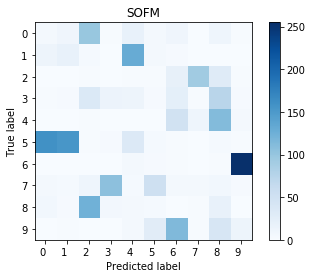

Mapping 6

Información del clasificador SOFM SOFM(verbose=True, step=0.05, show_epoch=5, shuffle_data=True, signals=None, n_inputs=64, n_outputs=10, weight=(64, 10), features_grid=[10, 1], distance=['euclid', 'neg_euclid_distance'], grid_type=['rectangle', 'find_neighbours_on_rect_grid', 'find_step_scaler_on_rect_grid'], learning_radius=3, std=1, reduce_radius_after=5, reduce_std_after=100, reduce_step_after=100):
             precision    recall  f1-score   support

          0       0.00      0.00      0.00       200
          1       0.05      0.06      0.06       160
          2       0.01      0.02      0.01       170
          3       0.00      0.00      0.00       147
          4       0.06      0.07      0.06       166
          5       0.00      0.00      0.00       177
          6       0.00      0.00      0.00       359
          7       0.00      0.00      0.00       264
          8       0.02      0.04      0.03       198
          9       0.00      0.00      0.00       16

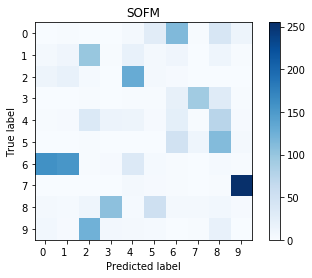

Mapping 7

Información del clasificador SOFM SOFM(verbose=True, step=0.05, show_epoch=5, shuffle_data=True, signals=None, n_inputs=64, n_outputs=10, weight=(64, 10), features_grid=[10, 1], distance=['euclid', 'neg_euclid_distance'], grid_type=['rectangle', 'find_neighbours_on_rect_grid', 'find_step_scaler_on_rect_grid'], learning_radius=3, std=1, reduce_radius_after=5, reduce_std_after=100, reduce_step_after=100):
             precision    recall  f1-score   support

          0       0.04      0.04      0.04       166
          1       0.01      0.01      0.01       200
          2       0.36      0.62      0.46       160
          3       0.00      0.00      0.00       170
          4       0.00      0.01      0.01       147
          5       0.02      0.01      0.02       166
          6       0.22      0.27      0.24       177
          7       0.00      0.00      0.00       359
          8       0.00      0.00      0.00       264
          9       0.01      0.01      0.01       19

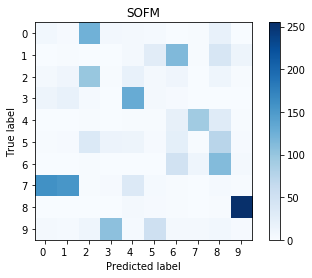

Mapping 8

Información del clasificador SOFM SOFM(verbose=True, step=0.05, show_epoch=5, shuffle_data=True, signals=None, n_inputs=64, n_outputs=10, weight=(64, 10), features_grid=[10, 1], distance=['euclid', 'neg_euclid_distance'], grid_type=['rectangle', 'find_neighbours_on_rect_grid', 'find_step_scaler_on_rect_grid'], learning_radius=3, std=1, reduce_radius_after=5, reduce_std_after=100, reduce_step_after=100):
             precision    recall  f1-score   support

          0       0.03      0.03      0.03       198
          1       0.01      0.01      0.01       166
          2       0.00      0.00      0.00       200
          3       0.01      0.01      0.01       160
          4       0.61      0.76      0.68       170
          5       0.01      0.01      0.01       147
          6       0.10      0.14      0.12       166
          7       0.10      0.06      0.08       177
          8       0.01      0.01      0.01       359
          9       0.91      0.97      0.94       26

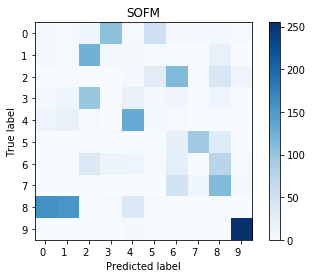

Mapping 9

Información del clasificador SOFM SOFM(verbose=True, step=0.05, show_epoch=5, shuffle_data=True, signals=None, n_inputs=64, n_outputs=10, weight=(64, 10), features_grid=[10, 1], distance=['euclid', 'neg_euclid_distance'], grid_type=['rectangle', 'find_neighbours_on_rect_grid', 'find_step_scaler_on_rect_grid'], learning_radius=3, std=1, reduce_radius_after=5, reduce_std_after=100, reduce_step_after=100):
             precision    recall  f1-score   support

          0       0.00      0.00      0.00       264
          1       0.02      0.02      0.02       198
          2       0.45      0.75      0.56       166
          3       0.00      0.00      0.00       200
          4       0.08      0.11      0.10       160
          5       0.04      0.02      0.03       170
          6       0.09      0.14      0.11       147
          7       0.01      0.01      0.01       166
          8       0.38      0.63      0.47       177
          9       0.00      0.00      0.00       35

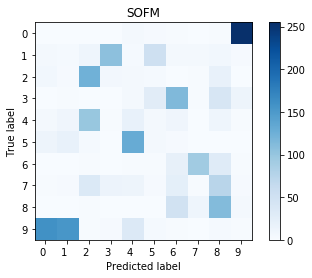

In [28]:
for k in range(10):
    print('Mapping {}'.format(k))
    new_ytest = (original_y_test + k) % 10
    
    clr = (sofm, classification_report(new_ytest, predicted))
    print("\nInformación del clasificador SOFM %s:\n%s\n\n" % clr)
    
    cm = confusion_matrix(new_ytest, predicted)              
    print("Confusion matrix:\n%s" % cm)
    
    classes = ['0','1', '2','3','4','5','6','7','8','9']            
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, 
           yticklabels=classes,
           title="SOFM",
           ylabel='True label',
           xlabel='Predicted label')
    
    plt.setp(ax.get_xticklabels(), rotation=0, ha="right", rotation_mode="anchor");
    plt.show()

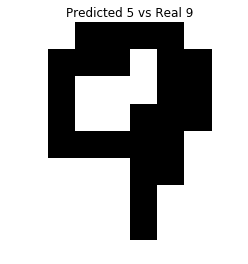

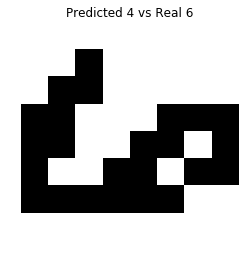

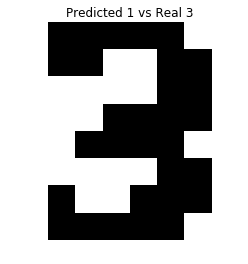

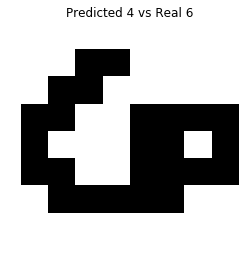

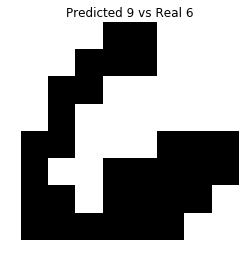

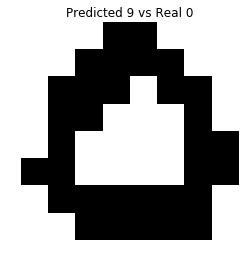

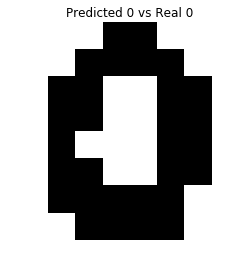

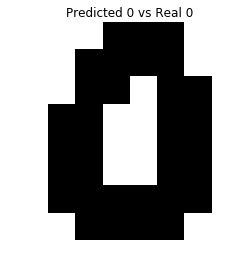

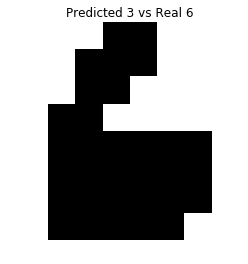

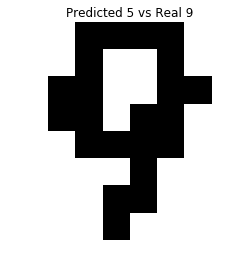

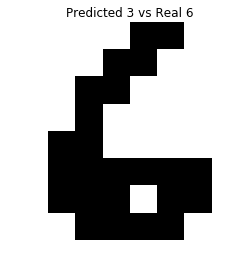

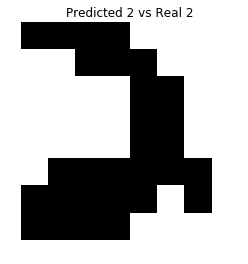

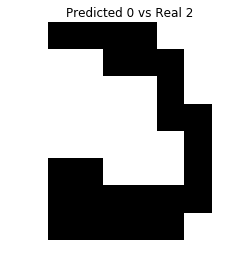

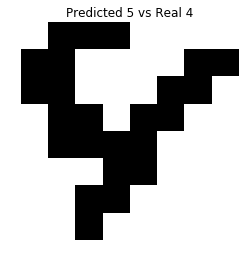

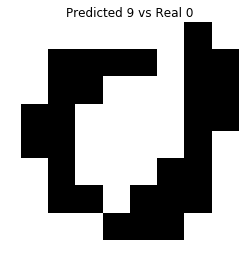

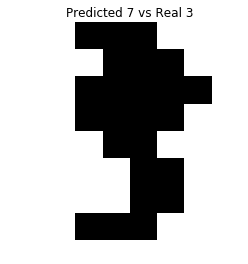

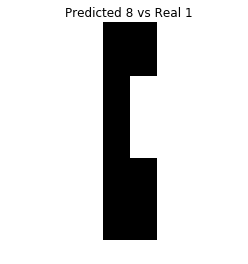

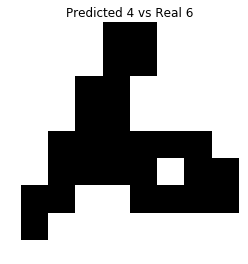

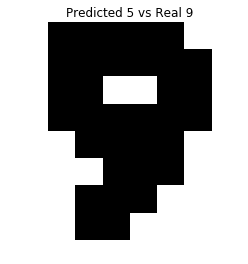

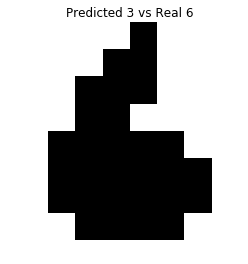

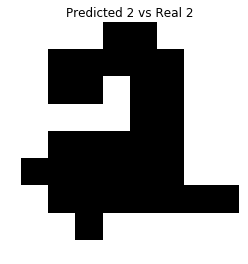

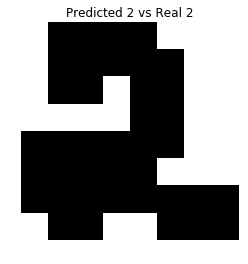

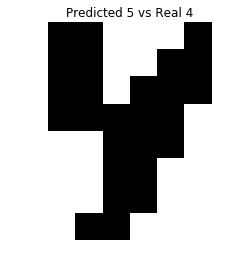

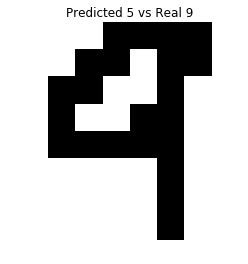

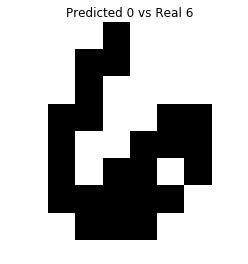

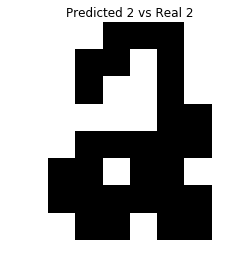

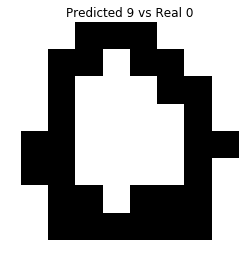

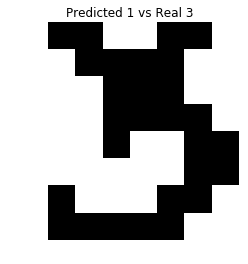

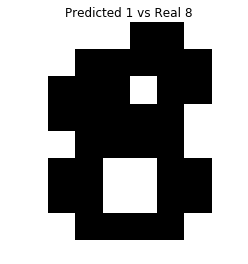

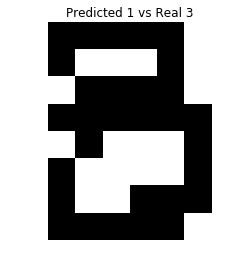

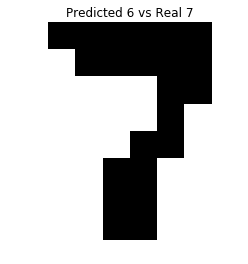

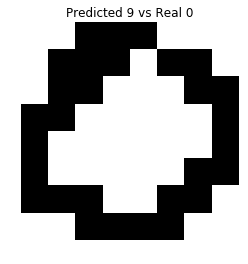

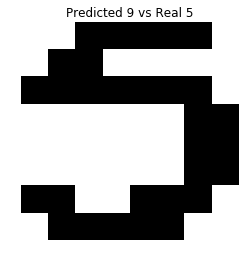

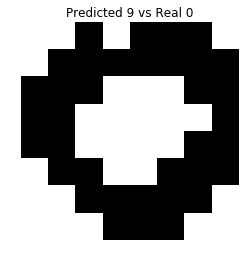

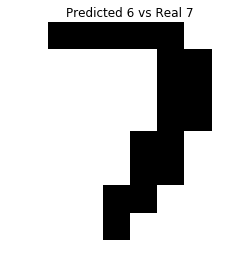

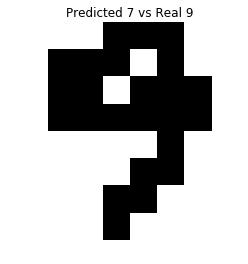

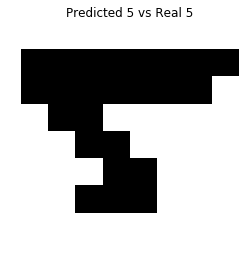

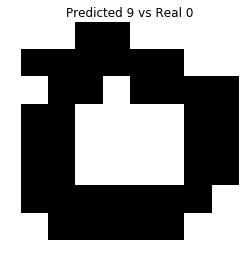

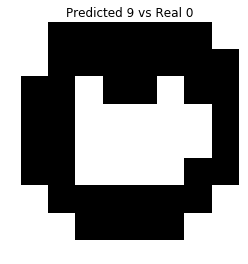

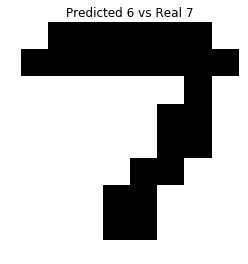

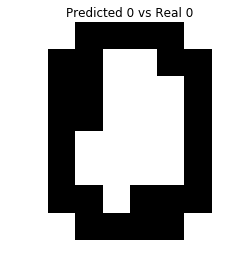

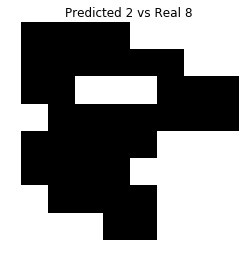

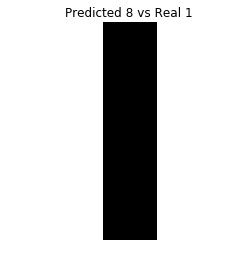

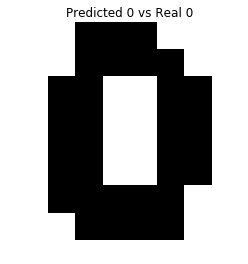

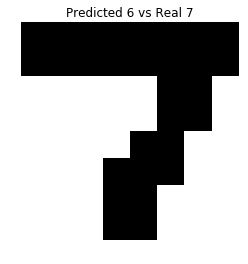

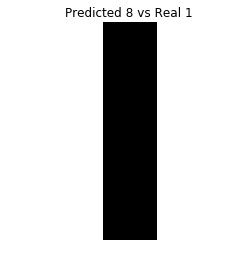

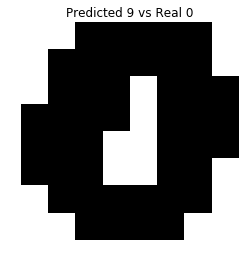

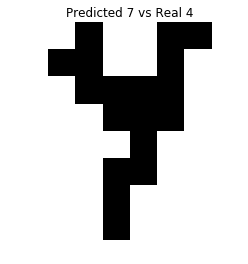

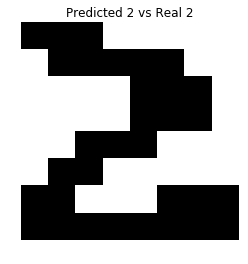

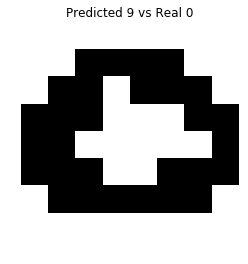

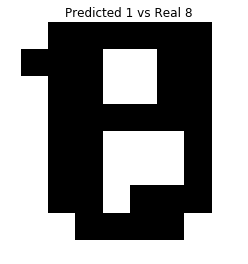

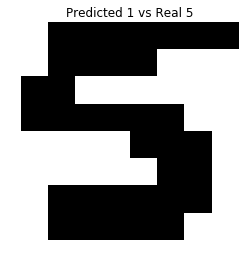

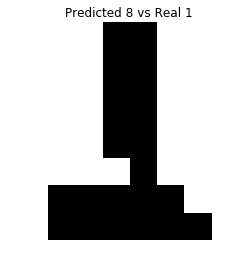

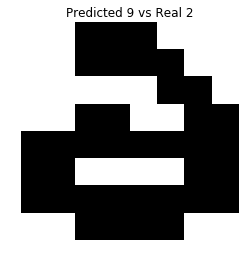

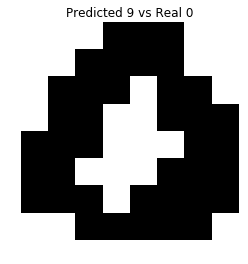

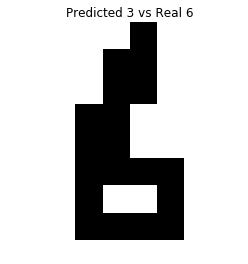

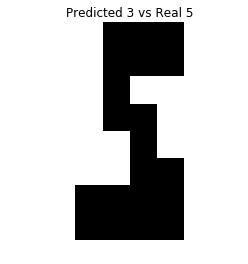

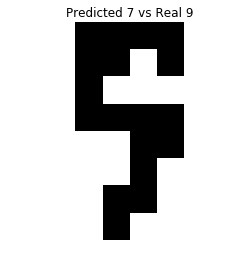

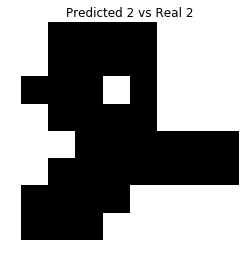

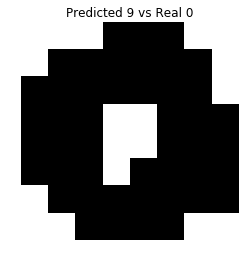

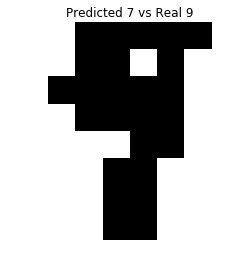

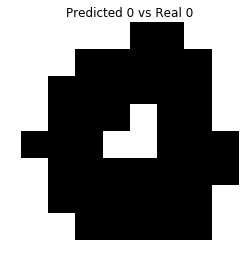

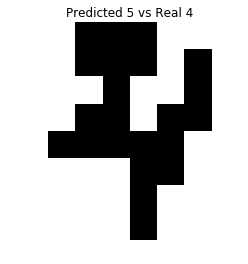

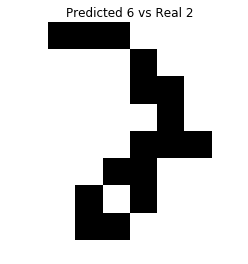

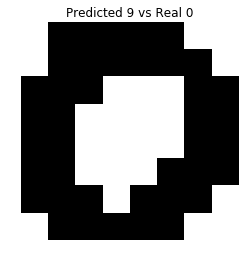

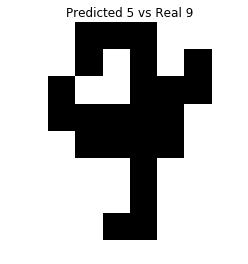

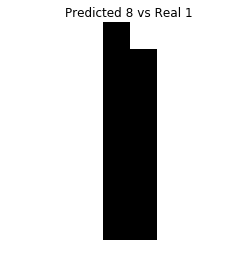

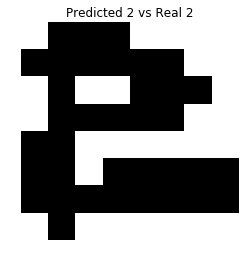

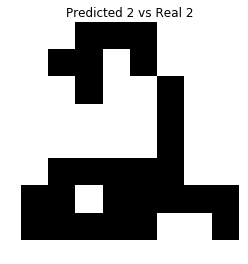

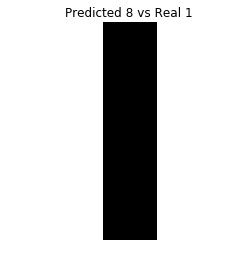

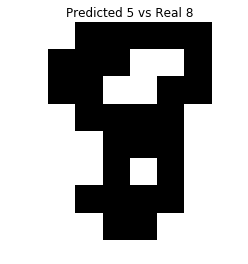

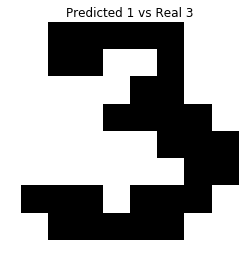

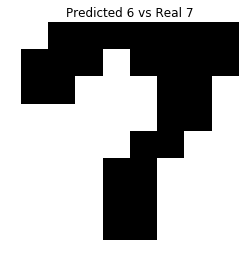

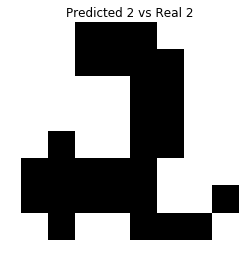

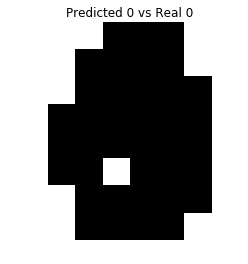

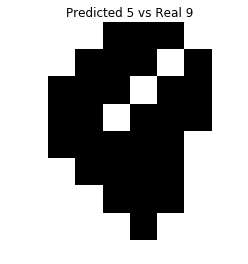

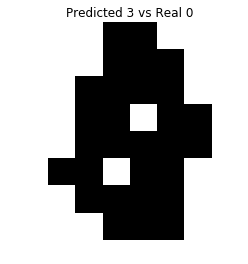

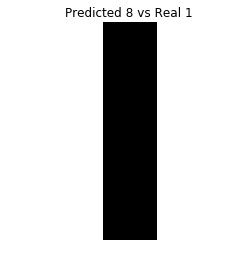

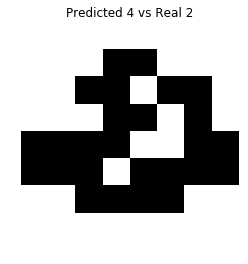

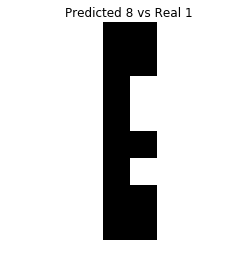

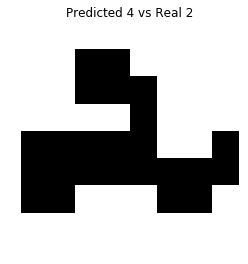

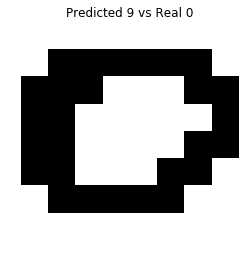

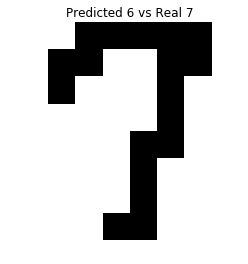

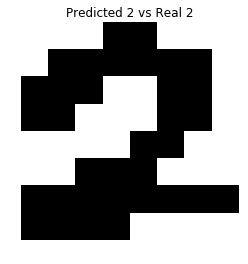

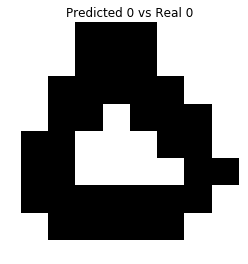

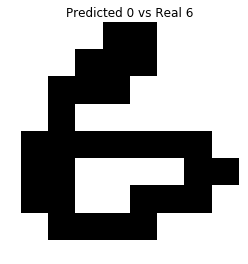

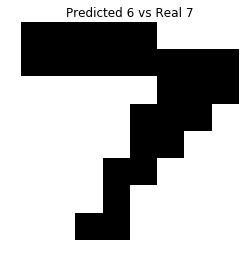

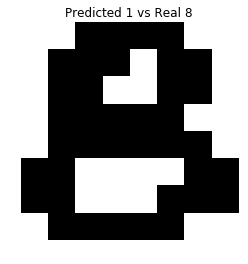

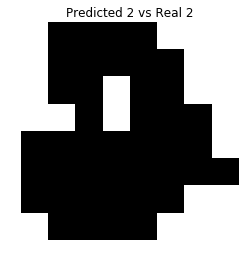

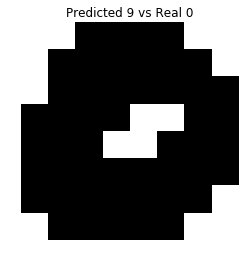

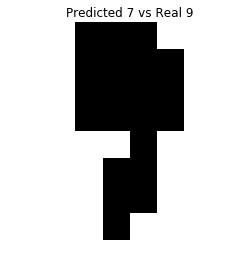

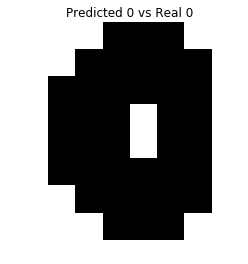

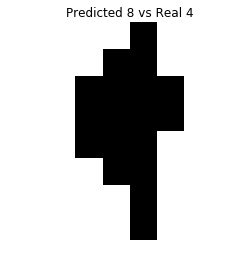

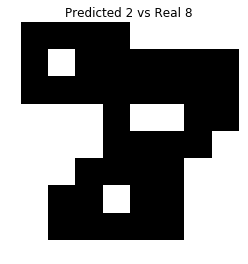

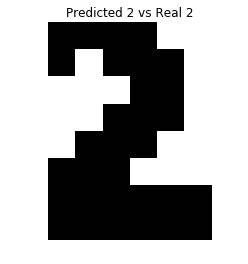

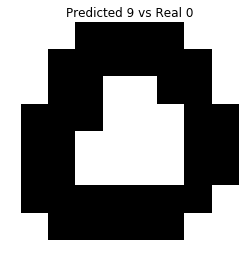

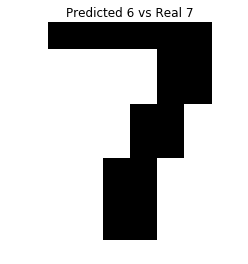

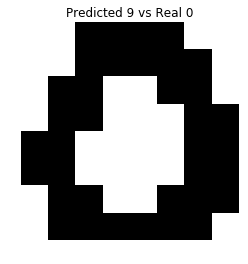

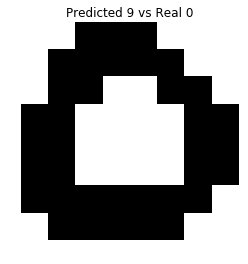

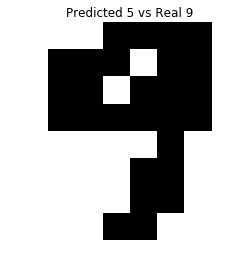

In [29]:
images_prediction = list(zip(matrix_x_test_resized, predicted, y_test))
images_prediction = images_prediction[0:100]
grid_len = int(sqrt(len(images_prediction))) + 1
for (image, prediction, real) in images_prediction:
    plt.figure()
    #plt.subplot(grid_len, grid_len, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Predicted {} vs Real {}'.format((prediction + 9) % 10, real))
    plt.show()

#plt.show()

Como podemos ver no es una implementación que siempre converge, esto puede deberse a que la data es muy dificil de tratar (como es mencionada en la pagina web del dataset) o a los parametros iniciales de la implementación de sofm  